In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style='whitegrid',palette='deep', font='Adobe Fan Heiti Std', font_scale=1, rc={'figure.dpi':120})
%matplotlib inline
data = pd.read_csv('豐原房價.csv')

data


,經度,緯度,屋齡,面積,建物類型,用途,樓別/樓高,佈局,電梯,管理員,車位數量,價格,行政區,交易年份
0,120.726550,24.251521,2.0,48.41,住宅大樓(11層含以上有電梯),住家用,二層/十三層,3房2廳2衛,有,有,1,"17,450,000",豐原區,113
1,120.729626,24.254307,2.0,123.09,住宅大樓(11層含以上有電梯),住商用,"一層,二層,三層,四層,地下一層,見其他登記事項/十五層",3房3廳4衛,有,有,2,"32,680,000",豐原區,113
2,120.724842,24.244168,7.0,71.67,住宅大樓(11層含以上有電梯),商業用,"一層,見其他登記事項/十四層",NaN,有,有,1,"24,500,000",豐原區,113
3,120.718278,24.237637,3.0,44.75,住宅大樓(11層含以上有電梯),住家用,十層/十一層,3房2廳1衛,有,有,1,"13,000,000",豐原區,113
4,120.725969,24.237795,7.0,45.40,住宅大樓(11層含以上有電梯),住家用,七層/十二層,3房2廳2衛,有,有,1,"14,080,000",豐原區,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,120.716053,24.246743,49.0,9.21,透天厝,住家用,全/三層,4房2廳2衛,無,無,0,"2,000,000",豐原區,112
863,120.722131,24.254664,19.0,14.86,住宅大樓(11層含以上有電梯),住家用,十四層/十四層,1房1衛,有,有,0,"3,960,000",豐原區,112
864,120.709544,24.242072,33.0,38.44,透天厝,住家用,全/四層,3房3廳3衛,無,無,0,"10,700,000",豐原區,112
865,120.709501,24.252509,45.0,31.02,透天厝,住家用,全/二層,5房3廳2衛,無,無,0,"8,500,000",豐原區,112


In [5]:
data = data[['經度', '緯度', '屋齡', '面積', '建物類型', '用途', '樓別/樓高', '佈局', '電梯', '管理員',
'車位數量', '行政區', '交易年份','價格']]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   經度      867 non-null    float64
 1   緯度      867 non-null    float64
 2   屋齡      836 non-null    float64
 3   面積      867 non-null    object 
 4   建物類型    867 non-null    object 
 5   用途      865 non-null    object 
 6   樓別/樓高   866 non-null    object 
 7   佈局      838 non-null    object 
 8   電梯      867 non-null    object 
 9   管理員     867 non-null    object 
 10  車位數量    867 non-null    int64  
 11  行政區     867 non-null    object 
 12  交易年份    867 non-null    int64  
 13  價格      867 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 95.0+ KB


In [7]:
#補值前 資料裡有一些數字比較大 有用到逗號 要先把逗號去掉
data['價格'] = data['價格'].replace(',', '', regex=True).astype(float)
data['面積'] = data['面積'].replace(',', '', regex=True).astype(float)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   經度      867 non-null    float64
 1   緯度      867 non-null    float64
 2   屋齡      836 non-null    float64
 3   面積      867 non-null    float64
 4   建物類型    867 non-null    object 
 5   用途      865 non-null    object 
 6   樓別/樓高   866 non-null    object 
 7   佈局      838 non-null    object 
 8   電梯      867 non-null    object 
 9   管理員     867 non-null    object 
 10  車位數量    867 non-null    int64  
 11  行政區     867 non-null    object 
 12  交易年份    867 non-null    int64  
 13  價格      867 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 95.0+ KB


In [9]:
data = data.drop_duplicates()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 866
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   經度      864 non-null    float64
 1   緯度      864 non-null    float64
 2   屋齡      834 non-null    float64
 3   面積      864 non-null    float64
 4   建物類型    864 non-null    object 
 5   用途      862 non-null    object 
 6   樓別/樓高   863 non-null    object 
 7   佈局      835 non-null    object 
 8   電梯      864 non-null    object 
 9   管理員     864 non-null    object 
 10  車位數量    864 non-null    int64  
 11  行政區     864 non-null    object 
 12  交易年份    864 non-null    int64  
 13  價格      864 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 101.2+ KB


In [11]:
data['建物類型'].value_counts()

建物類型
透天厝                420
住宅大樓(11層含以上有電梯)    221
華廈(10層含以下有電梯)      172
公寓(5樓含以下無電梯)        51
Name: count, dtype: int64

In [12]:
data['用途'].value_counts()

用途
住家用    682
住商用     92
商業用     47
其他      14
辦公用      9
工業用      7
商辦用      4
農業用      4
住工用      3
Name: count, dtype: int64

In [13]:
data['建物類型'].fillna('住宅大樓(11層含以上有電梯)',inplace=True)
data['用途'].fillna('住家用',inplace=True)
data.dropna(subset=['佈局'],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9048\482503012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['建物類型'].fillna('住宅大樓(11層含以上有電梯)',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9048\482503012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [14]:
data.describe()

,經度,緯度,屋齡,面積,車位數量,交易年份,價格
count,835.000000,835.000000,805.000000,835.000000,835.000000,835.000000,8.350000e+02
mean,120.720306,24.248810,27.689441,43.763832,0.282635,112.438323,1.180749e+07
std,0.010755,0.008772,16.185122,42.295903,0.483912,0.496479,1.038923e+07
min,120.698025,24.221240,1.000000,6.120000,0.000000,112.000000,9.200000e+05
25%,120.712147,24.242829,16.000000,27.070000,0.000000,112.000000,6.200000e+06
50%,120.721723,24.248506,29.000000,36.960000,0.000000,112.000000,9.600000e+06
75%,120.726526,24.254292,39.000000,50.680000,1.000000,113.000000,1.488000e+07
max,120.756701,24.276887,72.000000,904.380000,2.000000,113.000000,1.930000e+08


In [15]:
s = data['價格'].describe()
IQR = s['75%'] - s['25%']
upper_lim = s['75%'] + IQR*1.5
lower_lim = s['25%'] - IQR*1.5
data = data[data['價格'] < upper_lim]

In [16]:
s = data['面積'].describe()
IQR = s['75%'] - s['25%']
upper_lim = s['75%'] + IQR*1.5
lower_lim = s['25%'] - IQR*1.5
data = data[data['面積'] < upper_lim]

In [17]:
data.describe()

,經度,緯度,屋齡,面積,車位數量,交易年份,價格
count,769.000000,769.000000,743.000000,769.000000,769.000000,769.000000,7.690000e+02
mean,120.720361,24.248732,28.185734,37.027503,0.289987,112.430429,1.007458e+07
std,0.010739,0.008728,16.098181,16.057317,0.476441,0.495458,5.490829e+06
min,120.698025,24.221240,1.000000,6.120000,0.000000,112.000000,9.200000e+05
25%,120.712646,24.242832,16.000000,26.600000,0.000000,112.000000,6.000000e+06
50%,120.721784,24.248309,29.000000,35.680000,0.000000,112.000000,9.000000e+06
75%,120.726526,24.254260,39.000000,47.180000,1.000000,113.000000,1.340000e+07
max,120.756701,24.276887,72.000000,80.860000,2.000000,113.000000,2.700000e+07


Text(0, 0.5, '數量')

findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\c

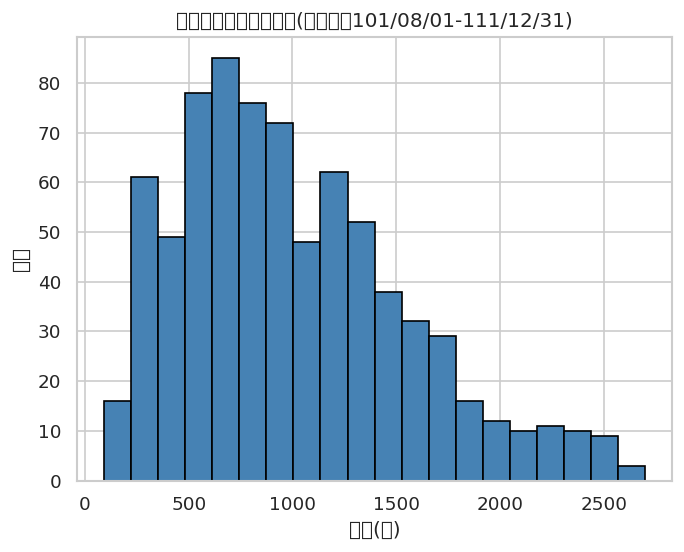

In [18]:
plt.hist(data['價格']/10000, bins=20, color='steelblue', edgecolor='black')
plt.title('台中市豐原區房價分佈(交易時間101/08/01-111/12/31)')
plt.xlabel('價格(萬)')
plt.ylabel('數量')

findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not foun

Text(58.766500000000015, 0.5, '價格(萬)')

findfont: Font family 'Adobe Fan Heiti Std' not found.
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'A

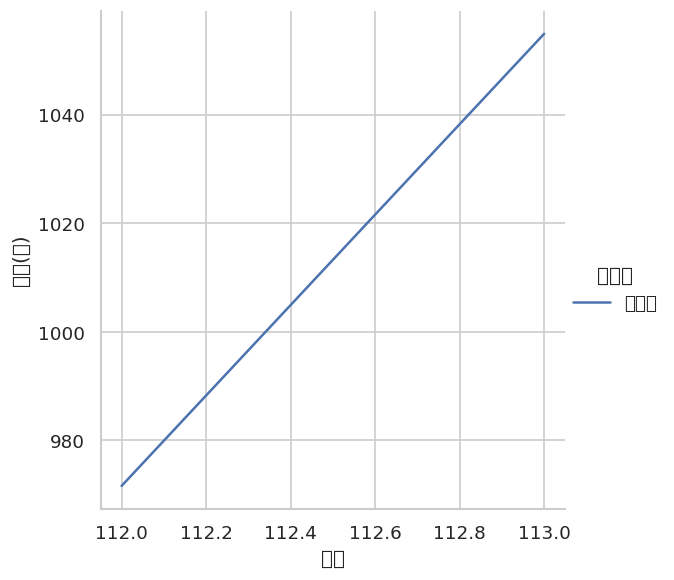

In [19]:
df = data.sort_values(by='交易年份',ascending=True)
df['價格']=df['價格']/10000
sns.relplot(x='交易年份', y='價格', hue='行政區', data=df,kind='line',ci=None)
plt.xlabel('年度')
plt.ylabel('價格(萬)')

In [20]:
data.loc[data['建物類型'].isin(['工廠','廠辦','農舍','倉庫']), '建物類型'] = '其他'
data['建物類型'] = data['建物類型'].str.split("\(",expand=True)[0]
data.loc[data['建物類型'].isin(['店面（店舖)']), '建物類型'] = '店面'

<>:2: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9048\1976336709.py:2: SyntaxWarning: invalid escape sequence '\('
  data['建物類型'] = data['建物類型'].str.split("\(",expand=True)[0]


findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 27155 (\N{CJK UNIFIED IDEOGRAPH-6A13}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
findfont: Font family 'Adobe Fan H

<Axes: xlabel='建物類型', ylabel='行政區'>

findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
findfont: Font family 'Adobe Fan Heiti

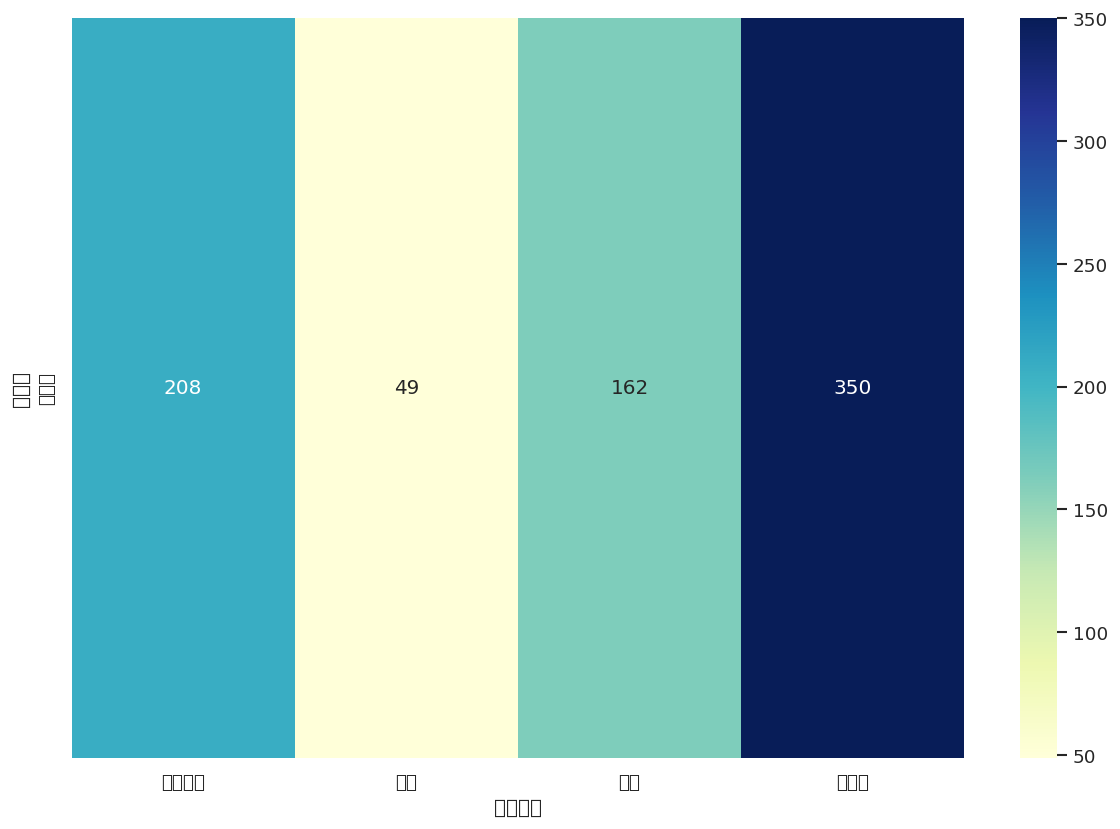

In [21]:
cross_table = pd.crosstab(data['行政區'],data['建物類型'])
plt.figure(figsize=(12,8))
sns.heatmap(cross_table,cmap='YlGnBu',annot=True,fmt='d')

In [22]:
data

,經度,緯度,屋齡,面積,建物類型,用途,樓別/樓高,佈局,電梯,管理員,車位數量,行政區,交易年份,價格
0,120.726550,24.251521,2.0,48.41,住宅大樓,住家用,二層/十三層,3房2廳2衛,有,有,1,豐原區,113,17450000.0
3,120.718278,24.237637,3.0,44.75,住宅大樓,住家用,十層/十一層,3房2廳1衛,有,有,1,豐原區,113,13000000.0
4,120.725969,24.237795,7.0,45.40,住宅大樓,住家用,七層/十二層,3房2廳2衛,有,有,1,豐原區,113,14080000.0
6,120.718135,24.249104,46.0,17.12,華廈,住商用,二層/八層,2房1廳1衛,有,有,0,豐原區,113,4380000.0
7,120.722521,24.251766,27.0,62.84,住宅大樓,商業用,十三層/十三層,2房1廳2衛,有,有,0,豐原區,113,8720001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,120.716053,24.246743,49.0,9.21,透天厝,住家用,全/三層,4房2廳2衛,無,無,0,豐原區,112,2000000.0
863,120.722131,24.254664,19.0,14.86,住宅大樓,住家用,十四層/十四層,1房1衛,有,有,0,豐原區,112,3960000.0
864,120.709544,24.242072,33.0,38.44,透天厝,住家用,全/四層,3房3廳3衛,無,無,0,豐原區,112,10700000.0
865,120.709501,24.252509,45.0,31.02,透天厝,住家用,全/二層,5房3廳2衛,無,無,0,豐原區,112,8500000.0


In [23]:
data.loc[data['用途'].isin(['住家用\)']), '用途'] = '住家用'
data.loc[~data['用途'].isin(['住家用','住商用','商業用','辦公用','其他']), '用途'] = '其他'

<>:1: SyntaxWarning: invalid escape sequence '\)'
<>:1: SyntaxWarning: invalid escape sequence '\)'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9048\1691569819.py:1: SyntaxWarning: invalid escape sequence '\)'
  data.loc[data['用途'].isin(['住家用\)']), '用途'] = '住家用'


In [24]:
data['樓別'] = data['樓別/樓高'].str.split('/',expand=True)[0] #樓別/樓高
data['樓高'] = data['樓別/樓高'].str.split('/',expand=True)[1] #樓別/樓高
data.drop(['樓別/樓高'],axis=1,inplace=True)

In [25]:
data.樓別.value_counts().tail(100)

樓別
全                   350
三層                   56
四層                   47
二層                   42
五層                   42
七層                   33
六層                   29
八層                   25
九層                   24
十層                   22
一層                   17
十二層                  12
十一層                  12
十三層                  10
一層,二層,騎樓              8
一層,見其他登記事項            7
十四層                   6
十五層                   6
十六層                   3
一層,二層                 2
十二層,見其他登記事項           2
一層,騎樓,見其他登記事項         2
一層,二層,見其他登記事項         1
十七層                   1
四層,騎樓                 1
十八層                   1
三層,陽台                 1
一層,騎樓,地下層             1
一層,二層,地下層             1
一層,二層,三層,四層,地下一層      1
一層,騎樓,夾層              1
一層,二層,三層,騎樓           1
五層,電梯樓梯間              1
Name: count, dtype: int64

In [26]:
print('處理前一共有',len(data.樓別.unique()),'不同的資料')
data['樓別'] = data['樓別'].str.split(',', expand=True)[0]
print('處理後一共有',len(data.樓別.unique()),'不同的資料')

處理前一共有 34 不同的資料
處理後一共有 20 不同的資料


In [34]:
data.loc[data['樓別'].isin(['見其他登記事項','屋頂突出物','夾層','地下','','騎樓']), '樓別'] = '其他'

def categorize_floor(x):
    if pd.isna(x):  # 检查是否是 NaN
        return '未知'  # 或者你可以选择其他的默认值
    if '地下' in x:
        return '地下'
    elif x == '其他':
        return '其他'
    elif x in ['全']:
        return '全層'
    elif x in ['一層', '二層', '三層', '四層', '五層']:
        return '低層'
    elif x in ['六層', '七層', '八層', '九層', '十層', '十一層', '十二層', '十三層', '十四層', '十五層']:
        return '中層'
    else:
        return '高層'

data['樓別'] = data['樓別'].apply(categorize_floor)


In [35]:
data.loc[data['樓別'].isin(['見其他登記事項','屋頂突出物','夾層','地下','','騎樓']), '樓別'] = '其他'
data['樓別'] = data['樓別'].apply(
lambda x: '地下' if '地下' in x 
else '其他' if x in '其他'
else '全層' if x in '全'
else '低層' if x in ['一層', '二層', '三層', '四層', '五層']
else '中層' if x in ['六層', '七層', '八層', '九層', '十層', '十一層', '十二層', '十三層', '十四層', '十五層']
else '高層')

In [36]:
data['樓別'].value_counts()

樓別
高層    769
Name: count, dtype: int64

In [37]:
data.loc[data['樓高'].isin(['(空白)']), '樓高'] = '十五層' # 填補眾數
data['樓高'] = data['樓高'].apply(
lambda x:  '低層' if x in ['一層', '二層', '三層', '四層', '五層']
else '中層' if x in ['六層', '七層', '八層', '九層', '十層', '十一層', '十二層', '十三層', '十四層', '十五層']
else '高層')

In [38]:
data

,經度,緯度,屋齡,面積,建物類型,用途,電梯,管理員,車位數量,行政區,交易年份,價格,樓別,樓高,房,廳,衛
0,120.726550,24.251521,2.0,48.41,住宅大樓,住家用,有,有,1,豐原區,113,17450000.0,高層,高層,3,2,2
3,120.718278,24.237637,3.0,44.75,住宅大樓,住家用,有,有,1,豐原區,113,13000000.0,高層,高層,3,2,1
4,120.725969,24.237795,7.0,45.40,住宅大樓,住家用,有,有,1,豐原區,113,14080000.0,高層,高層,3,2,2
6,120.718135,24.249104,46.0,17.12,華廈,住商用,有,有,0,豐原區,113,4380000.0,高層,高層,2,1,1
7,120.722521,24.251766,27.0,62.84,住宅大樓,商業用,有,有,0,豐原區,113,8720001.0,高層,高層,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,120.716053,24.246743,49.0,9.21,透天厝,住家用,無,無,0,豐原區,112,2000000.0,高層,高層,4,2,2
863,120.722131,24.254664,19.0,14.86,住宅大樓,住家用,有,有,0,豐原區,112,3960000.0,高層,高層,1,1衛,None
864,120.709544,24.242072,33.0,38.44,透天厝,住家用,無,無,0,豐原區,112,10700000.0,高層,高層,3,3,3
865,120.709501,24.252509,45.0,31.02,透天厝,住家用,無,無,0,豐原區,112,8500000.0,高層,高層,5,3,2


In [40]:
print(data.columns)


Index(['經度', '緯度', '屋齡', '面積', '建物類型', '用途', '電梯', '管理員', '車位數量', '行政區',
       '交易年份', '價格', '樓別', '樓高', '房', '廳', '衛'],
      dtype='object')


In [42]:
# 打印所有列名以检查 '佈局' 列是否存在
print(data.columns)

# 如果 '佈局' 列存在，使用如下代码进行操作
if '佈局' in data.columns:
    # 确保 '佈局' 列是字符串类型
    data['佈局'] = data['佈局'].astype(str)
    
    # 提取 '房', '廳', '衛' 的数量
    data['房'] = data['佈局'].str.split('房', expand=True)[0]
    data['廳'] = data['佈局'].str.split('房', expand=True)[1].str.split('廳', expand=True)[0]
    data['衛'] = data['佈局'].str.split('房', expand=True)[1].str.split('廳', expand=True)[1].str.split('衛', expand=True)[0]

    # 删除 '佈局' 列
    data.drop('佈局', axis=1, inplace=True)
else:
    print("'佈局' 列不存在。")


Index(['經度', '緯度', '屋齡', '面積', '建物類型', '用途', '電梯', '管理員', '車位數量', '行政區',
       '交易年份', '價格', '樓別', '樓高', '房', '廳', '衛'],
      dtype='object')
'佈局' 列不存在。


In [51]:
import pandas as pd

# 示例数据创建
data = pd.DataFrame({
    '佈局': ['3房2廳1衛', '2房1廳1衛', '4房3廳2衛']  # 示例数据
})

# 确保 '佈局' 列是字符串类型
data['佈局'] = data['佈局'].astype(str)

# 分割并提取 '房', '廳', '衛'
data['房'] = data['佈局'].str.split('房', expand=True)[0]
data['廳'] = data['佈局'].str.split('房', expand=True)[1].str.split('廳', expand=True)[0]
data['衛'] = data['佈局'].str.split('房', expand=True)[1].str.split('廳', expand=True)[1].str.split('衛', expand=True)[0]

# 处理提取出的数据，填充缺失值为0
data['房'] = data['房'].fillna('0')
data['廳'] = data['廳'].fillna('0')
data['衛'] = data['衛'].fillna('0')

# 删除 '佈局' 列
data.drop('佈局', axis=1, inplace=True)

print(data)


   房  廳  衛
0  3  2  1
1  2  1  1
2  4  3  2


In [50]:
data['房'] = data['佈局'].str.split('房',expand=True)[0]
data['廳'] = data['佈局'].str.split('房',expand=True)[1].str.split('廳',expand=True)[0]
data['衛'] = data['佈局'].str.split('房',expand=True)[1].str.split('廳',expand=True)[1].str.split('衛',expand=True)[0]
data.drop('佈局',axis=1,inplace=True)

KeyError: '佈局'

In [52]:
data['房'] = data['房'].astype(float)
data['廳'] = data['廳'].astype(float)
data['衛'] = data['衛'].astype(float)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   房       3 non-null      float64
 1   廳       3 non-null      float64
 2   衛       3 non-null      float64
dtypes: float64(3)
memory usage: 204.0 bytes


In [55]:
import pandas as pd

# 示例数据创建
data = pd.DataFrame({
    '建物類型': ['類型1', '類型2'],
    '用途': ['用途1', '用途2'],
    '行政區': ['區域1', '區域2'],
    '樓別': ['地下', '高層'],
    '樓高': ['低層', '高層'],
    '電梯': ['有', '無'],
    '管理員': ['有', '無']
})

# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['建物類型', '用途', '行政區'])

# Label Encoding
code_dict = {'地下': 0, '其他': 1, '低層': 2, '中層': 3, '高層': 4, '全層': 5}
data_encoded['樓別'] = data_encoded['樓別'].map(code_dict)

code_dict = {'低層': 0, '中層': 1, '高層': 2}
data_encoded['樓高'] = data_encoded['樓高'].map(code_dict)

code_dict = {'無': 0, '有': 1}
data_encoded['電梯'] = data_encoded['電梯'].map(code_dict)
data_encoded['管理員'] = data_encoded['管理員'].map(code_dict)

print(data_encoded)


   樓別  樓高  電梯  管理員  建物類型_類型1  建物類型_類型2  用途_用途1  用途_用途2  行政區_區域1  行政區_區域2
0   0   0   1    1      True     False    True   False     True    False
1   4   2   0    0     False      True   False    True    False     True


In [56]:
# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['建物類型','用途','行政區'])
# Label Encoding
code_dict = {'地下': 0, '其他': 1, '低層': 2,'中層':3,'高層':4,'全層':5}
data_encoded['樓別'] = data_encoded['樓別'].map(code_dict)
code_dict = {'低層': 0, '中層': 1, '高層': 2}
data_encoded['樓高'] = data_encoded['樓高'].map(code_dict)
code_dict = {'無':0, '有':1}
data_encoded['電梯'] = data_encoded['電梯'].map(code_dict)
data_encoded['管理員'] = data_encoded['管理員'].map(code_dict)

In [57]:
data_encoded.columns

Index(['樓別', '樓高', '電梯', '管理員', '建物類型_類型1', '建物類型_類型2', '用途_用途1', '用途_用途2',
       '行政區_區域1', '行政區_區域2'],
      dtype='object')

In [59]:
import pandas as pd

# 示例数据创建
data_encoded = pd.DataFrame({
    '建物類型_類型1': [1, 0],
    '用途_用途1': [1, 0],
    '行政區_區域1': [1, 0],
    '建物類型_其他': [0, 1],
    '用途_其他': [0, 1],
    '行政區_中區': [0, 1]
})

# 打印所有列名
print("当前列名：", data_encoded.columns)

# 列出要删除的列名
columns_to_drop = ['建物類型_其他', '用途_其他', '行政區_中區']

# 删除实际存在的列
data_encoded = data_encoded.drop(columns=[col for col in columns_to_drop if col in data_encoded.columns])

# 打印删除后的列名
print("删除后的列名：", data_encoded.columns)


当前列名： Index(['建物類型_類型1', '用途_用途1', '行政區_區域1', '建物類型_其他', '用途_其他', '行政區_中區'], dtype='object')
删除后的列名： Index(['建物類型_類型1', '用途_用途1', '行政區_區域1'], dtype='object')


In [60]:
data_encoded = data_encoded.drop(['建物類型_其他','用途_其他','行政區_中區'],axis=1)

KeyError: "['建物類型_其他', '用途_其他', '行政區_中區'] not found in axis"

In [61]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   建物類型_類型1  2 non-null      int64
 1   用途_用途1    2 non-null      int64
 2   行政區_區域1   2 non-null      int64
dtypes: int64(3)
memory usage: 180.0 bytes


In [64]:
import pandas as pd

# 示例数据创建
data_encoded = pd.DataFrame({
    '屋齡': [5, None, 10, None, 7]
})

# 打印所有列名
print("当前列名：", data_encoded.columns)

# 分开屋齡为空和不为空的记录
Age_Na = data_encoded[data_encoded["屋齡"].isnull()]
Age_not_Na = data_encoded[data_encoded["屋齡"].notnull()]

# 打印结果
print("屋齡为空的记录：")
print(Age_Na)
print("屋齡不为空的记录：")
print(Age_not_Na)


当前列名： Index(['屋齡'], dtype='object')
屋齡为空的记录：
   屋齡
1 NaN
3 NaN
屋齡不为空的记录：
     屋齡
0   5.0
2  10.0
4   7.0


In [65]:
# 先將屋齡是空的和不是空的分開
Age_Na = data_encoded[data_encoded["屋齡"].isnull()]
Age_not_Na = data_encoded[data_encoded["屋齡"].notnull()]

In [66]:
# 找出特徵變數 X 和 目標變數 y
y = Age_not_Na['屋齡']
X = Age_not_Na.drop('屋齡',axis=1)

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 示例数据创建
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50],
    'target': [100, 200, 300, 400, 500]
})

# 特征和目标变量
X = data[['feature1', 'feature2']]
y = data['target']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印数据维度
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# 创建并训练模型
rfModel_age = RandomForestRegressor(n_estimators=100, random_state=42)
rfModel_age.fit(X_train, y_train)


X_train shape: (4, 2)
y_train shape: (4,)
X_test shape: (1, 2)
y_test shape: (1,)


RandomForestRegressor(random_state=42)

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rfModel_age = RandomForestRegressor(n_estimators=100,random_state=42)
rfModel_age.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
# 預測測試集
from sklearn.metrics import r2_score
y_pred =rfModel_age.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R方得分:', r2)

R方得分: nan


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [82]:
print("X_train columns:", X_train.columns)
print("Age_Na columns:", Age_Na.columns)


X_train columns: Index(['feature1', 'feature2'], dtype='object')
Age_Na columns: Index([], dtype='object')


In [83]:
print(Age_Na.columns)


Index([], dtype='object')


In [84]:
Age_Na = Age_Na[X_train.columns.intersection(Age_Na.columns)]


In [89]:
print(y_train.isnull().sum())


1


In [90]:
# 删除目标变量 y 中包含 NaN 的记录
X_train, y_train = X_train[~y_train.isnull()], y_train.dropna()


In [91]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 示例数据创建
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50],
    '屋齡': [5, None, 10, None, 7]
})

# 特征和目标变量
X = data[['feature1', 'feature2']]
y = data['屋齡']

# 删除目标变量中缺失值的记录
X, y = X[~y.isnull()], y.dropna()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练模型
rfModel_age = RandomForestRegressor(n_estimators=100, random_state=42)
rfModel_age.fit(X_train, y_train)

# 分开屋齡为空和不为空的记录
Age_Na = data[data["屋齡"].isnull()].copy()
Age_not_Na = data[data["屋齡"].notnull()]

# 删除 '屋齡' 列
if '屋齡' in Age_Na.columns:
    Age_Na.drop('屋齡', axis=1, inplace=True)

# 确保特征对齐
Age_Na = Age_Na[X_train.columns.intersection(Age_Na.columns)]

# 预测屋齡空值
Age_Na_value = rfModel_age.predict(Age_Na)
Age_Na['屋齡'] = Age_Na_value

# 整合数据
data = pd.concat([Age_not_Na, Age_Na], axis=0)
data.sort_index(inplace=True)

print(data)


   feature1  feature2     屋齡
0         1        10   5.00
1         2        20   9.34
2         3        30  10.00
3         4        40   9.34
4         5        50   7.00


In [97]:
Age_Na = Age_Na.copy()  # 确保对数据的修改不会影响原始 DataFrame
if '屋齡' in Age_Na.columns:
    Age_Na.drop('屋齡', axis=1, inplace=True)


In [99]:
print(data.columns)


Index(['feature1', 'feature2', '屋齡'], dtype='object')


In [102]:
data.columns = data.columns.str.strip()  # 去除多余的空格
print(data.columns)


Index(['feature1', 'feature2', '屋齡'], dtype='object')


In [103]:
# 重新加载数据（假设数据是从 CSV 文件中加载的）
data = pd.read_csv('your_data_file.csv')

# 检查数据中的列名
print(data.columns)


FileNotFoundError: [Errno 2] No such file or directory: 'your_data_file.csv'

In [98]:
y = data['價格']
X = data.drop('價格',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rfModel = RandomForestRegressor(n_estimators=100,random_state=42)
rfModel.fit(X_train, y_train)

y_pred =rfModel.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R方得分:', r2)

KeyError: '價格'

In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ",round(rmse/10000),'萬')

RMSE:  160 萬


In [42]:
from sklearn.model_selection import cross_val_score
rfModel_cv = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rfModel_cv, X, y, cv=5, scoring='r2')
print("隨機森林迴歸 R2 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

隨機森林迴歸 R2 score: 0.81 (+/- 0.05)


In [45]:
X.columns

Index(['經度', '緯度', '屋齡', '面積', '電梯', '管理員', '車位數量', '交易年份', '樓別', '樓高', '房',
       '廳', '衛', '建物類型_住宅大樓', '建物類型_公寓', '建物類型_套房', '建物類型_店面', '建物類型_華廈',
       '建物類型_辦公商業大樓', '建物類型_透天厝', '用途_住商用', '用途_住家用', '用途_商業用', '用途_辦公用',
       '行政區_北區', '行政區_北屯區', '行政區_南區', '行政區_南屯區', '行政區_東區', '行政區_西區',
       '行政區_西屯區'],
      dtype='object')

In [61]:
#西屯區,屋齡 30,面積 75坪,有電梯、管理員,車位:1,樓別:中層,樓高:高層,5房 2廳 2衛,建物類型:住宅大樓,用途:住家用
test= np.array(
[120.64359,
 24.179285,
 30, 
 75,
 1,
 1,
 1,
 111,
 3,  #樓別中層
 2,  #樓高高層
 5,  #房
 2,  #廳
 2,  #衛
 1, #住宅大樓
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1, #住家用
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]).reshape(1,31) 


In [92]:
price_pred = rfModel.predict(test)
print("預估價格為: %0.2f萬" % (price_pred/10000))
print("誤差範圍介於: %0.2f 萬 到 %0.2f 萬元之間" % (price_pred/10000-rmse/10000,price_pred/10000+rmse/10000))

預估價格為: 1523.07萬
誤差範圍介於: 1362.68 萬 到 1683.46 萬元之間


C:\Users\melal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
